Shape of the stacked tensor: torch.Size([2000, 2])


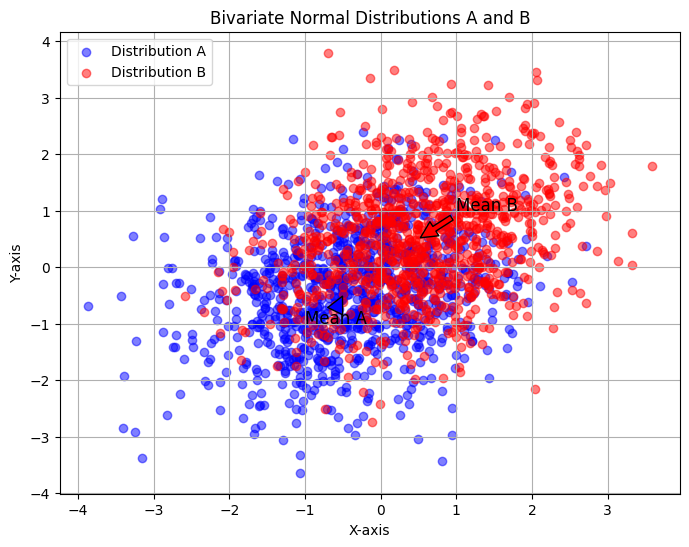

In [56]:
import torch

# Define the mean and covariance matrices for the two distributions
mean_A = torch.tensor([-0.5, -0.5])
cov_A = torch.tensor([[1, 0.25], [0.25, 1]])

mean_B = torch.tensor([0.5, 0.5])
cov_B = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

# Create the multivariate normal distributions for A and B
dist_A = torch.distributions.MultivariateNormal(mean_A, covariance_matrix=cov_A)
dist_B = torch.distributions.MultivariateNormal(mean_B, covariance_matrix=cov_B)

# Generate 1000 samples from each distribution
samples_A = dist_A.sample((1000,))
samples_B = dist_B.sample((1000,))

# Stack the samples into a single tensor
stacked_samples = torch.cat((samples_A, samples_B), dim=0)

# Display the shape of the stacked tensor
print("Shape of the stacked tensor:", stacked_samples.shape)

import matplotlib.pyplot as plt

# Convert the PyTorch tensors to NumPy arrays for plotting
samples_A_np = samples_A.numpy()
samples_B_np = samples_B.numpy()

# Create a scatter plot for both distributions
plt.figure(figsize=(8, 6))

# Plot samples from Distribution A
plt.scatter(samples_A_np[:, 0], samples_A_np[:, 1], color='blue', alpha=0.5, label='Distribution A')

# Plot samples from Distribution B
plt.scatter(samples_B_np[:, 0], samples_B_np[:, 1], color='red', alpha=0.5, label='Distribution B')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bivariate Normal Distributions A and B')
mean_A_np, mean_B_np = mean_A.numpy(), mean_B.numpy()
# Annotate the means with arrows
plt.annotate('Mean A', xy=mean_A_np, xytext=(mean_A_np[0] - 0.5, mean_A_np[1] - 0.5),
            arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12)
plt.annotate('Mean B', xy=mean_B_np, xytext=(mean_B_np[0] + 0.5, mean_B_np[1] + 0.5),
            arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12)

plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# K means clustering

In [57]:
samples_A_np_ = (samples_A_np - samples_A_np.min()) / (samples_A_np.max() - samples_A_np.min()) + 1
samples_A_np, samples_A_np_

(array([[-1.870196  , -1.461672  ],
        [-0.5407361 ,  0.3872015 ],
        [-0.17376488, -0.61032444],
        ...,
        [-1.4030733 , -0.9120883 ],
        [ 0.84728193,  0.3857482 ],
        [-0.49121287,  2.0877616 ]], dtype=float32),
 array([[1.3038193, 1.365905 ],
        [1.5058649, 1.6468887],
        [1.5616355, 1.4952891],
        ...,
        [1.3748106, 1.4494283],
        [1.7168097, 1.646668 ],
        [1.5133911, 1.9053323]], dtype=float32))

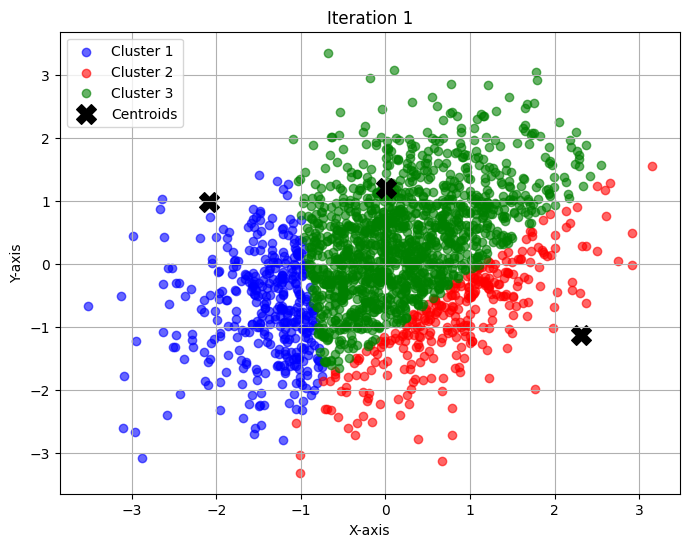

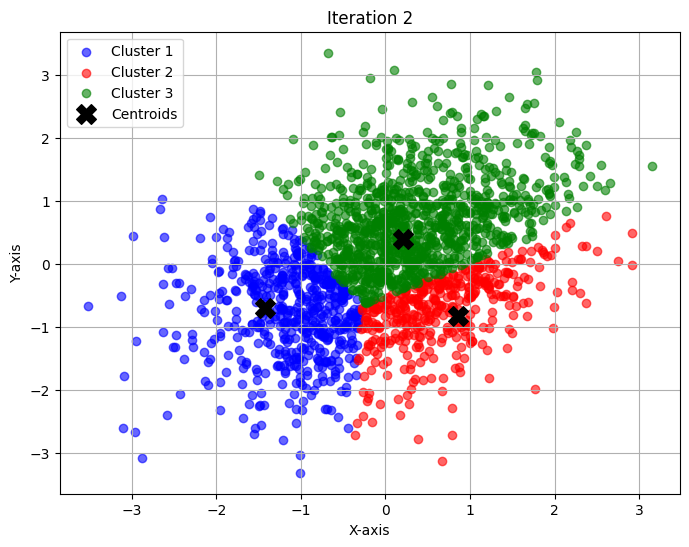

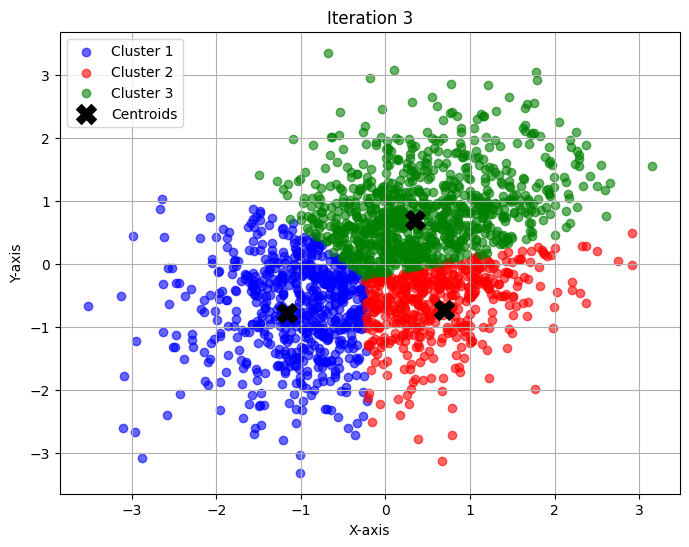

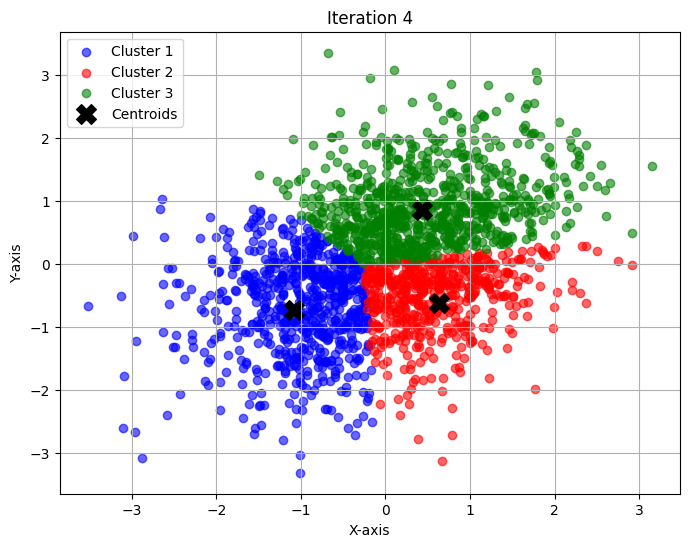

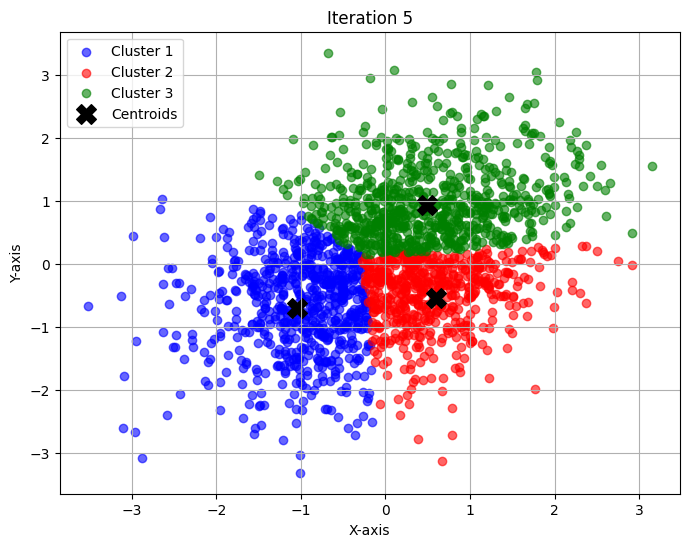

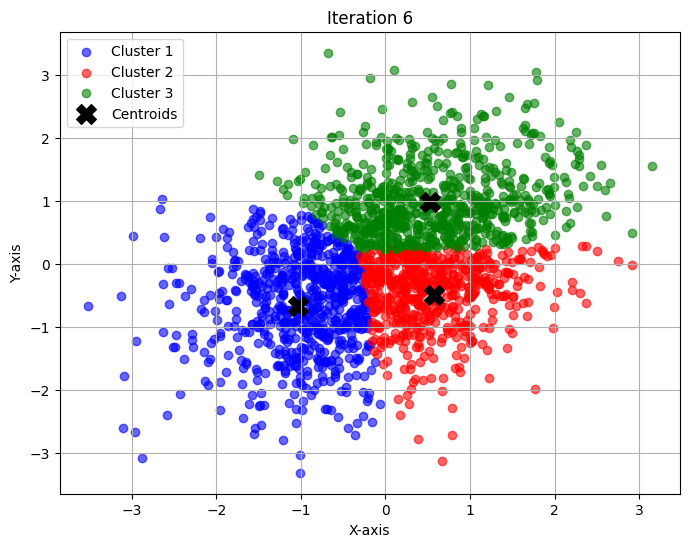

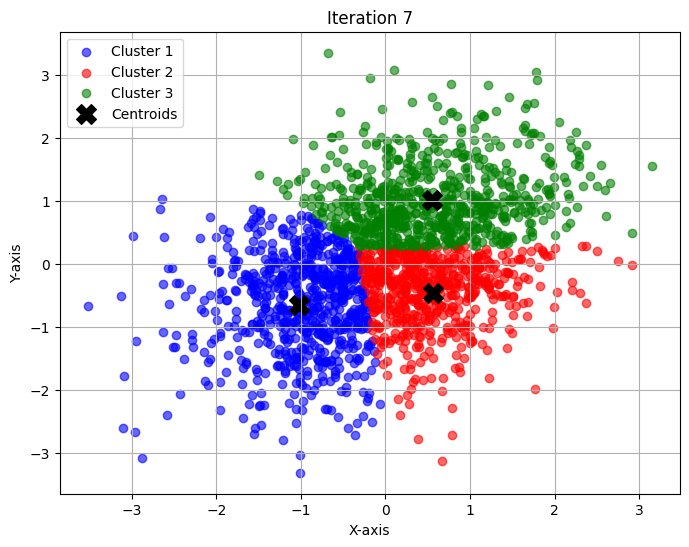

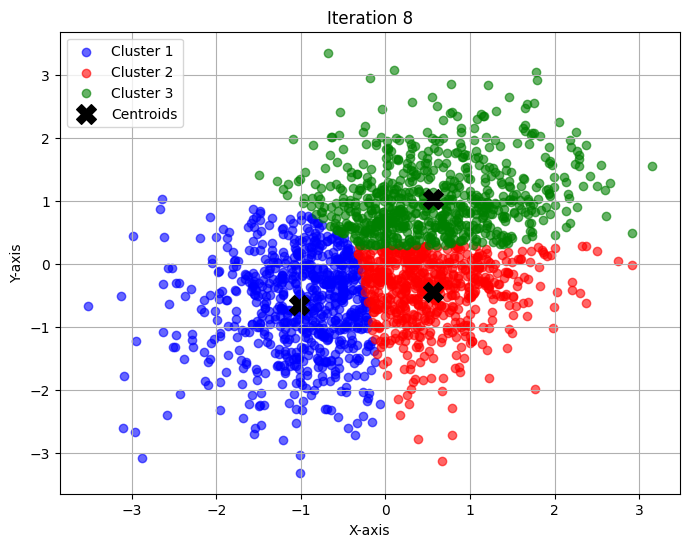

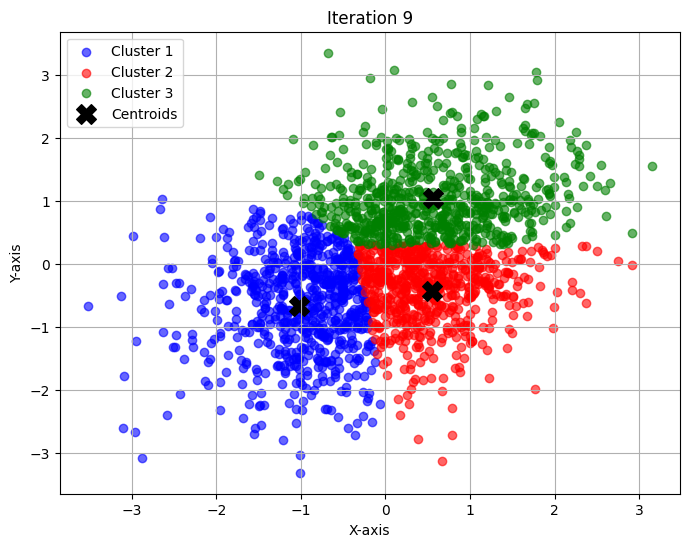

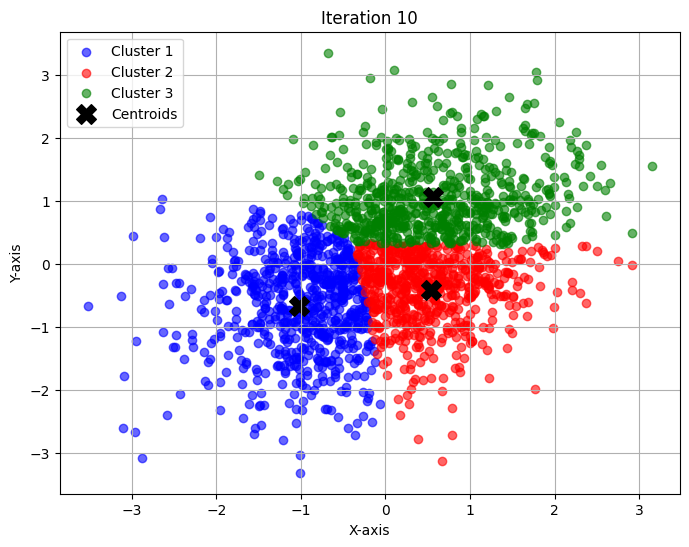

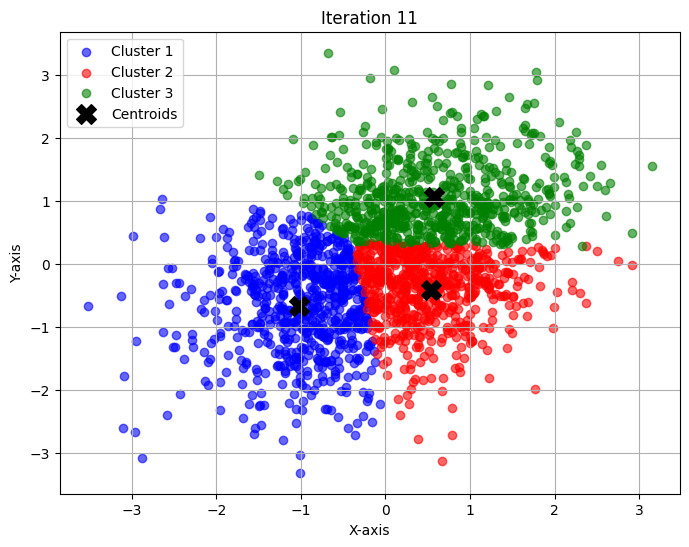

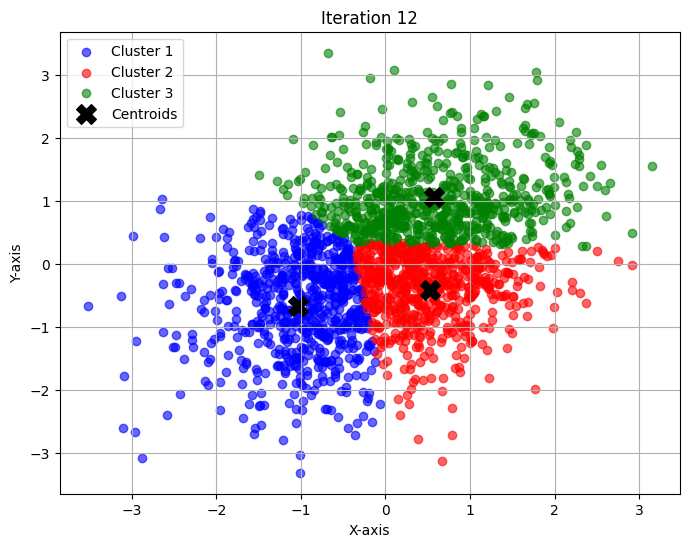

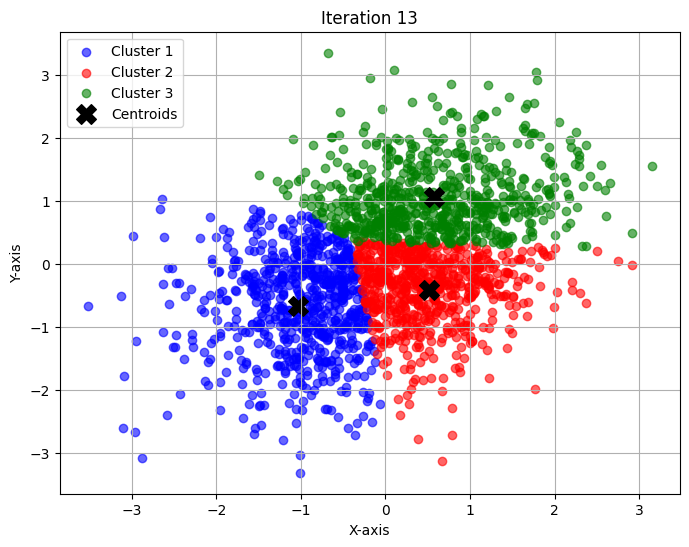

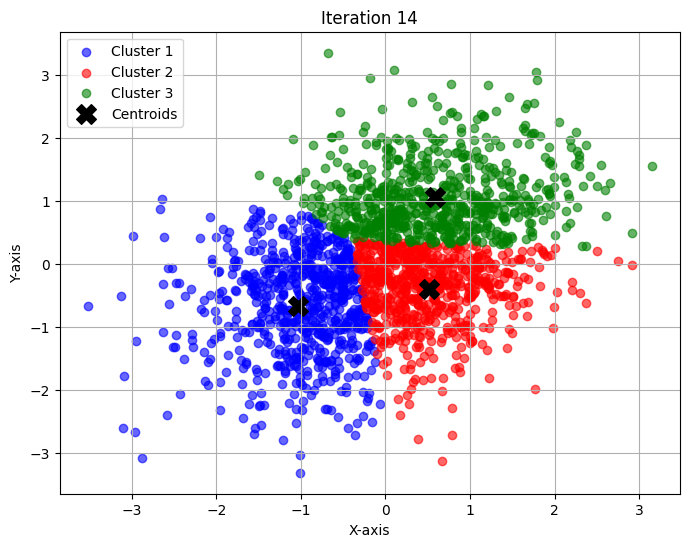

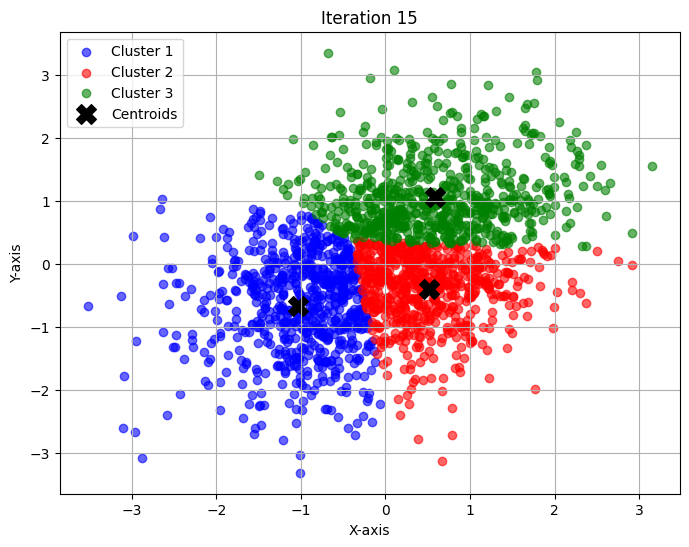

Converged at iteration 15


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
# 1. Scale the data using StandardScaler
scaler = StandardScaler()
data = np.vstack((samples_A_np, samples_B_np))  # Stacking both datasets
data_scaled = scaler.fit_transform(data)

def generate_random_centroids(data, k=3):
    """
    Generates k random centroids within the range of the given data.
    """
    min_vals = data.min(axis=0)
    max_vals = data.max(axis=0)
    centroids = np.random.uniform(low=min_vals, high=max_vals, size=(k, data.shape[1]))
    return centroids

def get_labels(data, centroids):
    """
    Assigns a label to each data point based on the closest centroid.
    """
    dist_matrix = np.sqrt(np.sum((data[:, np.newaxis] - centroids) ** 2, axis=2))
    return np.argmin(dist_matrix, axis=1)

def update_centroids(data, labels, k):
    """
    Updates centroids by computing the mean of the points assigned to each cluster.
    """
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def plot_kmeans_iteration(data, centroids, labels, iteration):
    """
    Plots the data points with different colors for each label, and marks the centroids.
    """
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']

    for i in range(3):
        plt.scatter(data[labels == i, 0], data[labels == i, 1], c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
    plt.title(f'Iteration {iteration}')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()


# 2. Initialize random centroids
k = 3
centroids = generate_random_centroids(data_scaled, k)

# 5. Repeat step 3 and 4 until centroids stop changing
max_iters = 50
for iteration in range(max_iters):
    # 3. Label each data point based on the nearest centroid
    labels = get_labels(data_scaled, centroids)

    # Plot the current iteration
    plot_kmeans_iteration(data_scaled, centroids, labels, iteration + 1)

    # 4. Update centroids
    new_centroids = update_centroids(data_scaled, labels, k)

    # Check for convergence (if centroids do not change, break the loop)
    if np.allclose(centroids, new_centroids):
        print(f'Converged at iteration {iteration + 1}')
        break

    centroids = new_centroids


# PCA

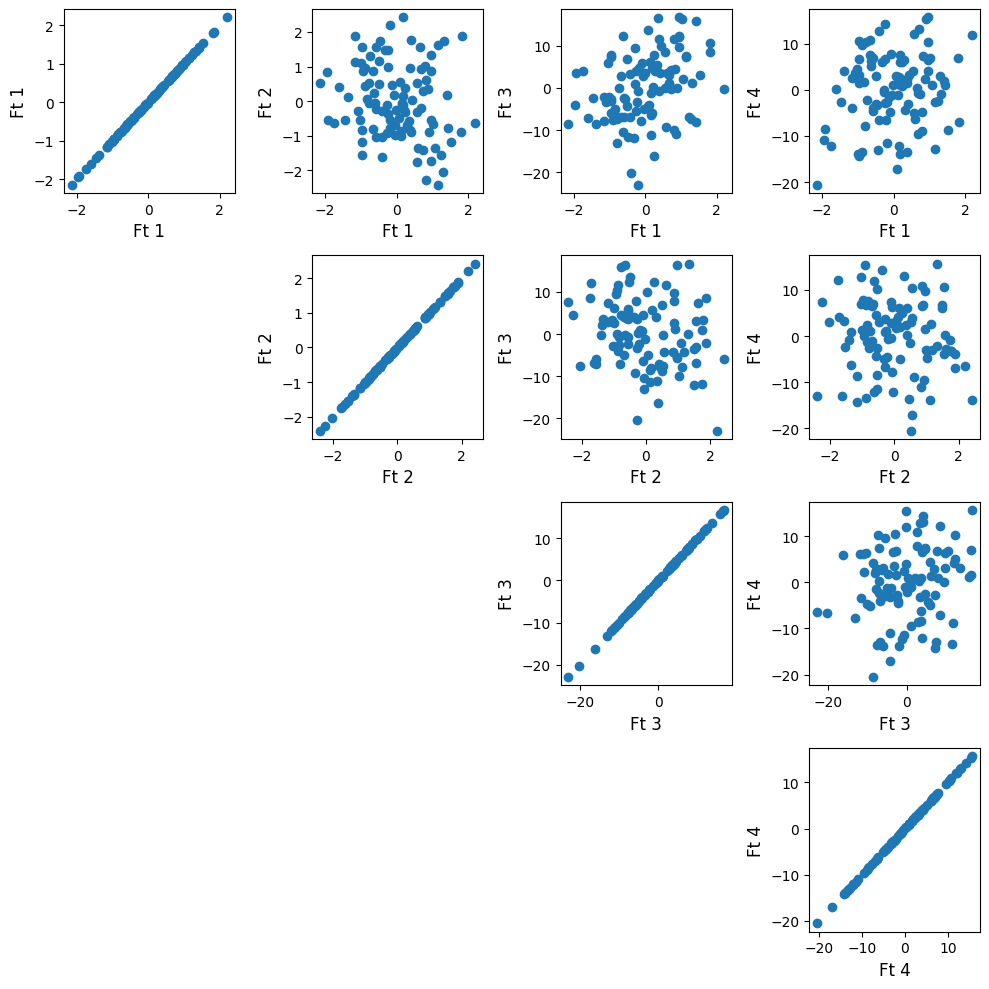

In [53]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

X= np.random.normal(0, 1, (100, 4))
X[:,2]=3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 8.1, 100)
X[:,3]=1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(8, 8.1, 100)

X=X - np.mean(X, axis=0)


plt.figure(figsize=(10, 10))
for i in range(4):
    for j in range(4):
        if j >= i:
            plt.subplot(4, 4, i * 4 + j + 1)
            plt.scatter(X[:, i], X[:, j])
            plt.xlabel(f'Ft {i+1}', fontsize=12)
            plt.ylabel(f'Ft {j+1}', fontsize=12)

plt.tight_layout()
plt.show()

# USING PCA LIB

In [54]:
pca = PCA(n_components=2)
pca.fit(X)

principle_components = pca.components_.T

for i, pc in enumerate(pca.components_):
    print(f"Principle Component {i+1}: {pc}")
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio_[i]}")
    print(pc)
    print()

Principle Component 1: [ 0.03737888 -0.02710295  0.77552395  0.62962755]
Explained Variance Ratio: 0.5857819724292105
[ 0.03737888 -0.02710295  0.77552395  0.62962755]

Principle Component 2: [ 0.00906362 -0.01244552  0.62969943 -0.77668629]
Explained Variance Ratio: 0.40044407116849856
[ 0.00906362 -0.01244552  0.62969943 -0.77668629]



# VIDEO METHOD (NON PYTORCH)

In [55]:
# By-hand method
cov_matrix = np.cov(X.T)
eigvals, eigvecs = np.linalg.eig(cov_matrix)

# Sorting by eigenvalue magnitude
ordering = np.argsort(eigvals)[::-1]
principal_comps_byhand = eigvecs[:, ordering]

# Compare principal components (account for potential sign flips)
def compare_components(pc1, pc2):
    return np.allclose(pc1, pc2) or np.allclose(pc1, -pc2)

print("Comparison of components:")
for i in range(2):
    print(f"Component {i+1} matches:", compare_components(principal_comps_byhand[:, i], principle_components[:, i]))

# print
-principal_comps_byhand[:,:2], principle_components

Comparison of components:
Component 1 matches: True
Component 2 matches: True


(array([[-0.03737888, -0.00906362],
        [ 0.02710295,  0.01244552],
        [-0.77552395, -0.62969943],
        [-0.62962755,  0.77668629]]),
 array([[ 0.03737888,  0.00906362],
        [-0.02710295, -0.01244552],
        [ 0.77552395,  0.62969943],
        [ 0.62962755, -0.77668629]]))

# PYTORCH.xyz namespace lib

In [65]:
import torch
# Convert numpy array to PyTorch tensor
X_torch = torch.tensor(X, dtype=torch.float32)

# Step 3: Covariance matrix computation in PyTorch
cov_matrix_torch = torch.matmul(X_torch.T, X_torch) / (X_torch.shape[0] - 1)

# Eigenvalue decomposition in PyTorch
eigvals_torch, eigvecs_torch = torch.linalg.eig(cov_matrix_torch)
eigvals_torch = eigvals_torch.real  # Only real part is needed
eigvecs_torch = eigvecs_torch.real  # Only real part is needed

# Sort eigenvalues and eigenvectors by the magnitude of eigenvalues
ordering_torch = torch.argsort(eigvals_torch, descending=True)
principal_comps_byhand_torch = eigvecs_torch[:, ordering_torch]

# Step 4: Perform PCA using sklearn for comparison
pca = PCA(n_components=2)
pca.fit(X)  # Fit on the numpy dataset
principle_components_lib = pca.components_.T

# Compare principal components (considering sign flips)
def compare_components(pc1, pc2):
    pc2_torch = torch.tensor(pc2, dtype=torch.float32)  # Cast to float32
    return torch.allclose(pc1, pc2_torch, atol=1e-5) or torch.allclose(pc1, -pc2_torch, atol=1e-5)

print("Comparison of components (accounting for sign flips):")
for i in range(2):
    pc1 = principal_comps_byhand_torch[:, i]
    pc2 = principle_components_lib[:, i]
    print(f"Component {i+1} matches:", compare_components(pc1, pc2))

# Step 5: Print Eigenvectors for comparison
print("\nBy-hand Eigenvectors (PyTorch):")
print(principal_comps_byhand_torch[:, :2])

print("\nScikit-learn PCA Components:")
print(principle_components_lib)

Comparison of components (accounting for sign flips):
Component 1 matches: True
Component 2 matches: True

By-hand Eigenvectors (PyTorch):
tensor([[ 0.0374, -0.0091],
        [-0.0271,  0.0124],
        [ 0.7755, -0.6297],
        [ 0.6296,  0.7767]])

Scikit-learn PCA Components:
[[ 0.03737888  0.00906362]
 [-0.02710295 -0.01244552]
 [ 0.77552395  0.62969943]
 [ 0.62962755 -0.77668629]]
